In [1]:
%pylab inline
import scanpy as sc
import pandas as pd
import pickle

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import os
os. getcwd()
os. chdir('/w5home/bmoore/scFoundation/annotation/')
os. getcwd()

'/mnt/cephfs/mir/rstewart/stewart-lab/isi5home/bmoore/scFoundation/annotation'

In [5]:
import numpy as np
seg_label = np.load('./data/Segerstolpe-test-label.npy')
seg_name = np.load('./data/Segerstolpe-str_label.npy')

In [31]:
print(seg_label, seg_name)

[10  3  7  3  4  4  3  3  2  3  3 10  3  3  3  4  3  4  2  7  3  3  3  6
  3  3  2  4  3  3 10  3  4  3  7  7  3  3  3 10  3  3  3  4  3  1  7  2
  7  1  3  6  6 10  2  3  3  4 12  1  7  7  3  3  3  3  3  7  3  3  3  2
  3  3  3  7  2  2  7  7  2  2  3  2  3 10  4  3  3  3  3  6  3  7 10  6
 10  4 10  3 10  4  2  3  7  3  7  3  6  7  3  3  4  3  4 10  4 10  3  6
  7  7  6  3  7  3  3  4  9  3  6  3  7  7  4  4  1  2  2  5  3  4  7  2
  7  3  7  3  3  6 10  6  2  7  7  4  5  2  5  4 10  3  7  7  3  7  3  3
  3  7  6  7  7  8  4 10  3  3  3  3  7  7  3  4  3 10  7  6  3  3 10  2
  2  3  4  3  7  4  7  6 10  3 10  4  3  4  3  7  4 10  6  3  2  3  4  4
  4  2  4  3  7 10  8  4  3  3 10  3 10  3  3  3  7  3  7  3  7  4 11  2
  3  3  7 10  3  2  3  7  7  3  4  3  3  7  3  0  3  3  5 10  3  5 10  3
 10  3  3  3  7  3  7  7  7  3  3  2  7  7  7  4  4  1  3  7  3  6 10  3
  3  7  3  8  3  4 10  3  2  3  3  2  7  7  7  3  7  7  3  2  3 10  3  7
  4  4  6  3  4  3 10  6  7  4  3  7  2  4  3  3 10

In [32]:
baron_data = np.load('/w5home/bmoore/scFoundation/enhancement/baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres5_embedding.npy')
print(baron_data, baron_data.shape)

[[ 0.29583892  1.6966388  -1.699737   ...  0.72071147 -1.683762
  -0.56356853]
 [ 0.24916513  1.2651974  -1.8872981  ...  0.7248193  -1.6864325
  -0.6044859 ]
 [ 0.68320775  1.3651291  -1.3567361  ...  0.801484   -1.2094082
  -0.30897483]
 ...
 [ 0.41434518  0.03556834 -0.32839456 ...  1.8116244  -0.81321853
  -1.0008976 ]
 [ 0.30467424  0.30973312 -1.0618364  ...  1.2561786  -0.32121158
  -0.7058981 ]
 [-0.79841703  0.34431908 -0.6186717  ...  1.4300239  -0.46456409
  -1.3068377 ]] (1076, 3072)


In [6]:
emb_path="./data/seg-emb.pkl"
emb=None
label=None
f=open(emb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if emb is None:
            emb = tmp_emb
            label = tmp_label
        else:
            emb = np.vstack([emb,tmp_emb])
            label = np.concatenate([label,tmp_label])
    except:
        break

emb = emb[-seg_label.shape[0]:,:]
label = label[-seg_label.shape[0]:]

In [7]:
emb_path="./data/seg-cellemb.pkl"
cellemb=None
label=None
f=open(emb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if cellemb is None:
            cellemb = tmp_emb
            label = tmp_label
        else:
            cellemb = np.vstack([cellemb,tmp_emb])
            label = np.concatenate([label,tmp_label])
    except:
        break

cellemb = cellemb[-seg_label.shape[0]:,:]
label = label[-seg_label.shape[0]:]

In [29]:
print(cellemb.shape, label.shape)

(427, 768) (427,) [10  3  7  3  4  4  3  3  2  3  3 10  3  3  3  4  3  4  2  7  3  3  3  6
  3  3  2  4  3  3 10  3  4  3  7  7  3  3  3 10  3  3  3  4  3  1  7  2
  7  1  3  6  6 10  2  3  3  4 12  1  7  7  3  3  3  3  3  7  3  3  3  2
  3  3  3  7  2  2  7  7  2  2  3  2  3 10  4  3  3  3  3  6  3  7 10  6
 10  4 10  3 10  4  2  3  7  3  7  3  6  7  3  3  4  3  4 10  4 10  3  6
  7  7  6  3  7  3  3  4  9  3  6  3  7  7  4  4  1  2  2  5  3  4  7  2
  7  3  7  3  3  6 10  6  2  7  7  4  5  2  5  4 10  3  7  7  3  7  3  3
  3  7  6  7  7  8  4 10  3  3  3  3  7  7  3  4  3 10  7  6  3  3 10  2
  2  3  4  3  7  4  7  6 10  3 10  4  3  4  3  7  4 10  6  3  2  3  4  4
  4  2  4  3  7 10  8  4  3  3 10  3 10  3  3  3  7  3  7  3  7  4 11  2
  3  3  7 10  3  2  3  7  7  3  4  3  3  7  3  0  3  3  5 10  3  5 10  3
 10  3  3  3  7  3  7  7  7  3  3  2  7  7  7  4  4  1  3  7  3  6 10  3
  3  7  3  8  3  4 10  3  2  3  3  2  7  7  7  3  7  7  3  2  3 10  3  7
  4  4  6  3  4  3 10  6  7  4  3

In [8]:
for i in range(seg_label.shape[0]):
    assert seg_label[i]==label[i]

In [9]:
y_pred = np.argmax(emb,1)

In [10]:
segadata = sc.AnnData(cellemb)
sc.pp.neighbors(segadata,use_rep='X')

sc.tl.umap(segadata)

segadata.obs['true_label']=seg_name[seg_label]
segadata.obs['pred_label']=seg_name[y_pred]

/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.

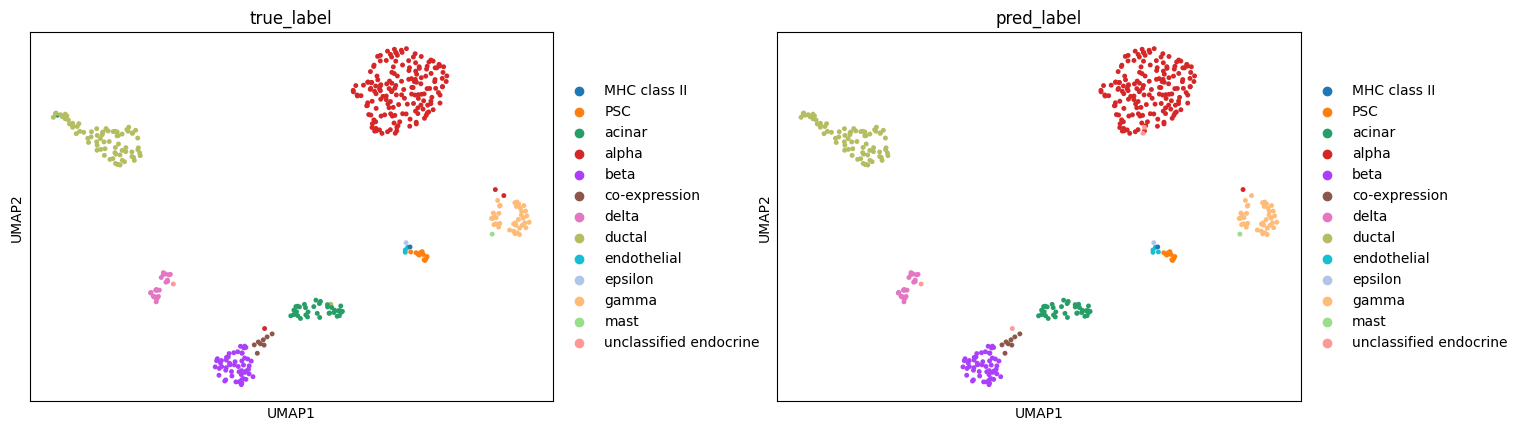

In [11]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
sc.pl.umap(segadata,color=['true_label','pred_label'],wspace=0.3,size=50,save='scf_seg')

In [12]:
ctpadata = sc.read_h5ad('./data/celltypist_0806_seg.h5ad')

ctpadata.obs['predict_strlabels']=seg_name[ctpadata.obs['predicted_labels'].values]
ctpadata.obs['predict_strlabels'] = ctpadata.obs['predict_strlabels'].astype('category')

sc.tl.umap(ctpadata)

In [13]:
pal = {}
for i in range(len(seg_name)):
    pal[segadata.obs.true_label.cat.categories[i]]=segadata.uns['true_label_colors'][i]

/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.

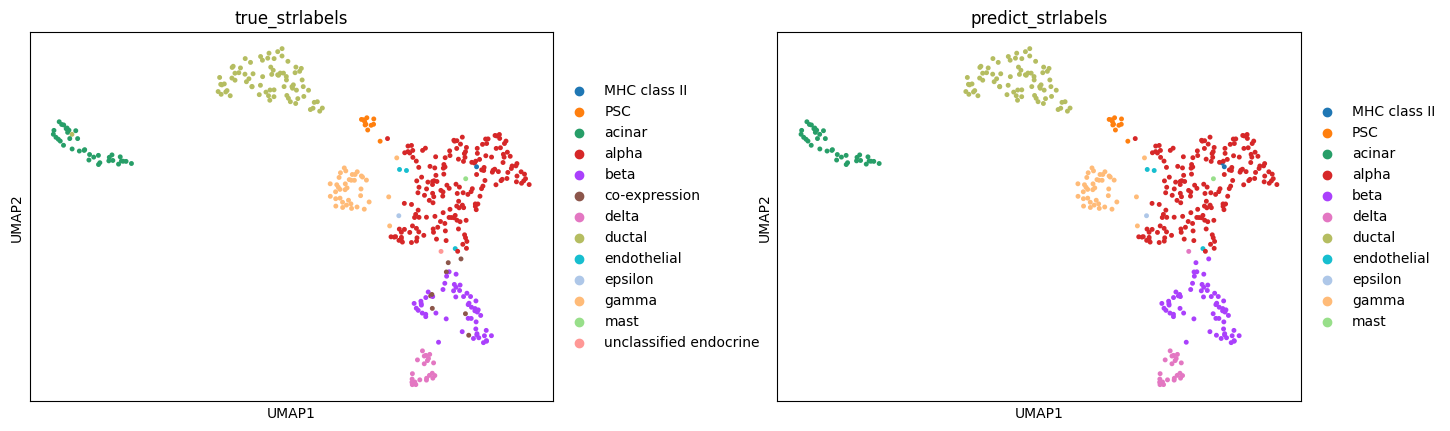

In [14]:
sc.pl.umap(ctpadata,color=['true_strlabels','predict_strlabels'],wspace=0.3,size=50,palette=pal,save='celltypist_seg')

In [15]:
ori_zheng_label = np.load('./data/zheng-test-label.npy')
zheng_name = np.load('./data/zheng-str_label.npy')

In [16]:
zhengemb_path="./data/zheng-emb-2mlp.pkl"
zheng_emb=None
zheng_label=None
f=open(zhengemb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if zheng_emb is None:
            zheng_emb = tmp_emb
            zheng_label = tmp_label
        else:
            zheng_emb = np.vstack([zheng_emb,tmp_emb])
            zheng_label = np.concatenate([zheng_label,tmp_label])
    except:
        break

In [17]:
for i in range(zheng_label.shape[0]):
    assert zheng_label[i]==ori_zheng_label[i]

In [18]:
y_pred = np.argmax(zheng_emb,1)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(zheng_label, y_pred, target_names=zheng_name))

                              precision    recall  f1-score   support

              CD14+ Monocyte       0.85      0.87      0.86       195
                     CD19+ B       0.86      0.88      0.87       558
                       CD34+       0.95      0.95      0.95        19
              CD4+ T Helper2       0.33      0.11      0.17         9
             CD4+/CD25 T Reg       0.69      0.67      0.68       612
  CD4+/CD45RA+/CD25- Naive T       0.56      0.61      0.58       185
         CD4+/CD45RO+ Memory       0.55      0.66      0.60       303
                    CD56+ NK       0.91      0.94      0.93       853
            CD8+ Cytotoxic T       0.90      0.81      0.85      2031
CD8+/CD45RA+ Naive Cytotoxic       0.84      0.90      0.87      1636
                   Dendritic       0.84      0.78      0.81       194

                    accuracy                           0.83      6595
                   macro avg       0.75      0.74      0.74      6595
                we

In [20]:
zhengemb_path="./data/zheng-cellemb-2mlp.pkl"
zheng_emb=None
zheng_label=None
f=open(zhengemb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if zheng_emb is None:
            zheng_emb = tmp_emb
            zheng_label = tmp_label
        else:
            zheng_emb = np.vstack([zheng_emb,tmp_emb])
            zheng_label = np.concatenate([zheng_label,tmp_label])
    except:
        break

In [21]:
zheng_emb.shape

(6595, 768)

In [22]:
zhengadata = sc.AnnData(zheng_emb)
sc.pp.neighbors(zhengadata,use_rep='X')
sc.tl.umap(zhengadata)
zhengadata.obs['true_label']=zheng_name[zheng_label]
zhengadata.obs['pred_label']=zheng_name[y_pred]

/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.

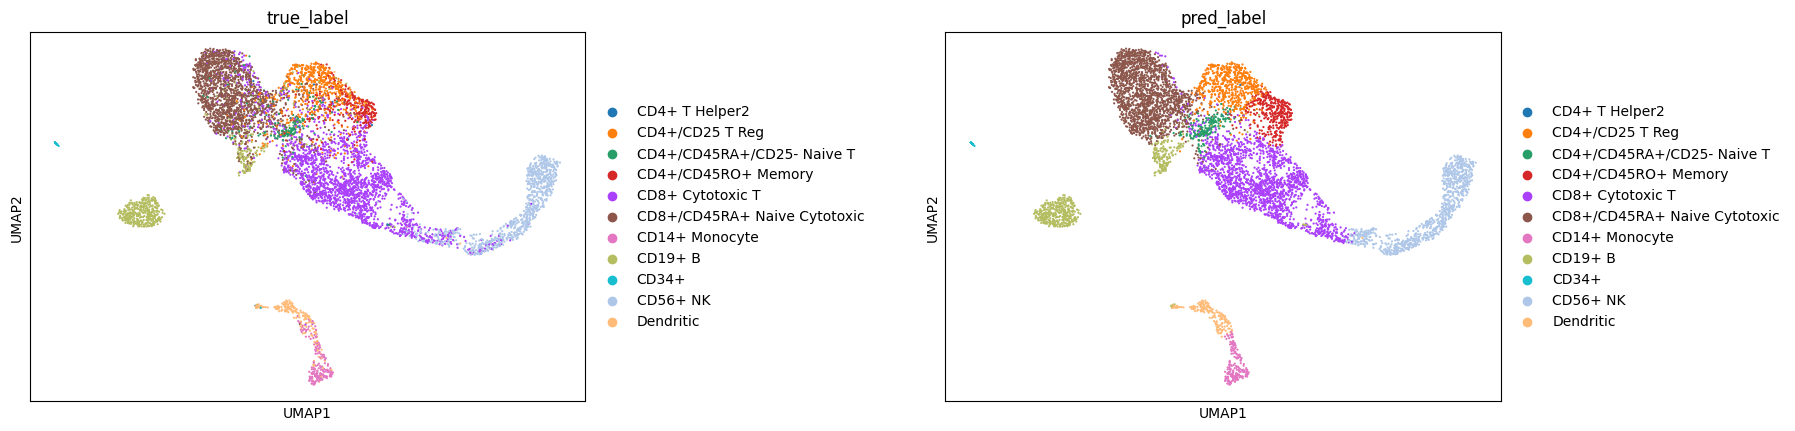

In [23]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
sc.pl.umap(zhengadata,color=['true_label','pred_label'],wspace=0.5,size=10,save='scf_zheng')

In [24]:
ctpzhengadata = sc.read_h5ad('./data/celltypist_0806_zheng68k.h5ad')

ctpzhengadata.obs['predict_strlabels']=zheng_name[ctpzhengadata.obs['predicted_labels'].values]
ctpzhengadata.obs['predict_strlabels'] = ctpzhengadata.obs['predict_strlabels'].astype('category')

sc.tl.umap(ctpzhengadata)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ctpzhengadata.obs['true_strlabels'], ctpzhengadata.obs['predict_strlabels'], target_names=zheng_name))

                              precision    recall  f1-score   support

              CD14+ Monocyte       0.86      0.85      0.85       195
                     CD19+ B       0.90      0.84      0.87       558
                       CD34+       1.00      0.84      0.91        19
              CD4+ T Helper2       0.00      0.00      0.00         9
             CD4+/CD25 T Reg       0.72      0.69      0.71       612
  CD4+/CD45RA+/CD25- Naive T       0.66      0.54      0.59       185
         CD4+/CD45RO+ Memory       0.70      0.47      0.56       303
                    CD56+ NK       0.93      0.92      0.92       853
            CD8+ Cytotoxic T       0.86      0.83      0.84      2031
CD8+/CD45RA+ Naive Cytotoxic       0.80      0.94      0.87      1636
                   Dendritic       0.84      0.83      0.83       194

                    accuracy                           0.83      6595
                   macro avg       0.75      0.70      0.72      6595
                we

In [26]:
pal = {}
for i in range(len(zheng_name)):
    pal[zhengadata.obs.true_label.cat.categories[i]]=zhengadata.uns['true_label_colors'][i]

/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/w5home/bmoore/Gamm_scRNAseq/src/pst_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.

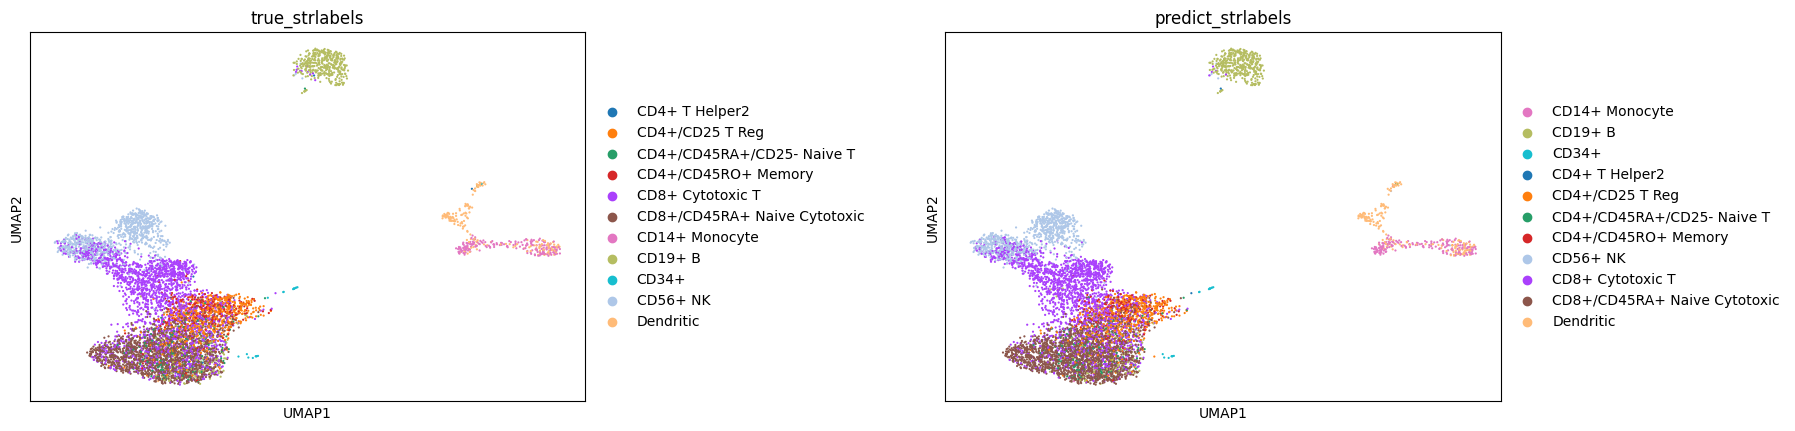

In [27]:
sc.pl.umap(ctpzhengadata,color=['true_strlabels','predict_strlabels'],wspace=0.5,size=10,palette=pal,save='celltypist_zheng')